<a href="https://colab.research.google.com/github/KoHawks/ai-hedge-fund/blob/main/BP_Brent_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 1: Download BP plc (GBp)
bp = yf.download("BP.L", start="2018-01-01", end="2024-12-31", auto_adjust=True)[['Close']]
bp.rename(columns={'Close': 'BP_Close'}, inplace=True)

# Step 2: Download Brent Crude (USD)
brent = yf.download("BZ=F", start="2018-01-01", end="2024-12-31")[['Close']]
brent.rename(columns={'Close': 'Brent_Close'}, inplace=True)

# Step 3: Merge and drop NaNs
df = bp.join(brent, how='inner').dropna()

# DEBUG: check shape of inputs
print("BP_Close shape:", df['BP_Close'].shape)
print("Brent_Close shape:", df['Brent_Close'].shape)

# Step 4: Run linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    df['Brent_Close'].values,  # make sure it's 1D
    df['BP_Close'].values
)

# Step 5: Print results
print("\n📊 LINEAR REGRESSION: BP Share Price Sensitivity to Brent")
print("----------------------------------------------------------")
print(f"🔁 Slope: {slope:.2f} GBp per $1 Brent move")
print(f"📈 R-squared: {r_value**2:.4f}")
print(f"🧪 p-value: {p_value:.4f}")
print("----------------------------------------------------------")

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Brent_Close'], df['BP_Close'], alpha=0.5, label='Daily Data')
plt.plot(df['Brent_Close'], intercept + slope * df['Brent_Close'], color='red', label='Regression Line')
plt.title("BP.L Share Price vs Brent Crude Price")
plt.xlabel("Brent Crude Oil Price (USD)")
plt.ylabel("BP.L Share Price (GBp)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BP_Close shape: (1727, 1)
Brent_Close shape: (1727, 1)


ValueError: too many values to unpack (expected 4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



📊 LINEAR REGRESSION: BP Share Price Sensitivity to Brent
----------------------------------------------------------
🔁 Slope: 6.14 GBp per $1 Brent move
📈 R-squared: 0.6215
🧪 p-value: 0.0000
----------------------------------------------------------


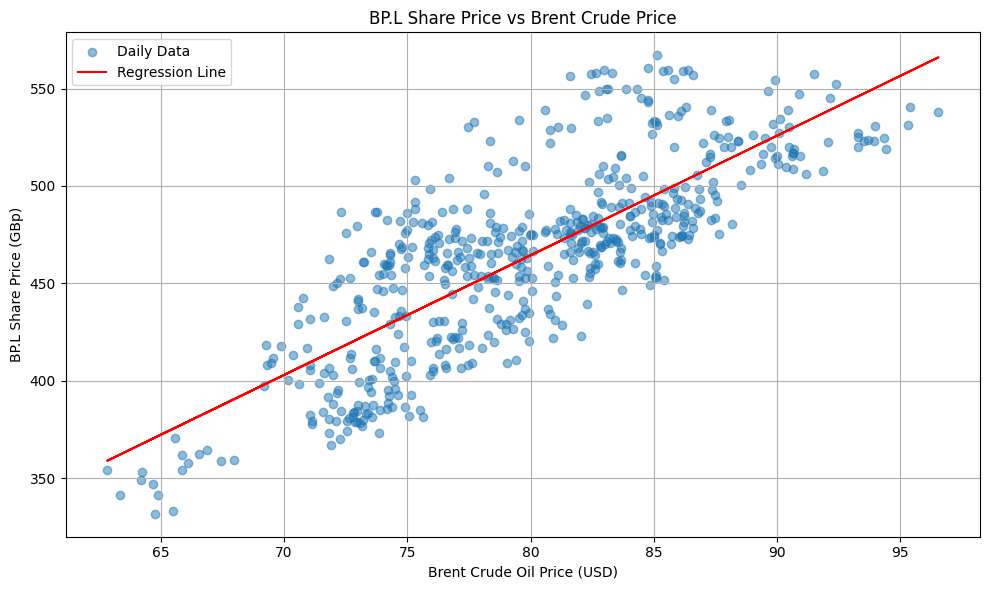

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Step 1: Download BP plc (FTSE-listed, GBp)
bp = yf.download("BP.L", start="2023-01-01", end="2025-04-30", auto_adjust=True)[['Close']]
bp.rename(columns={'Close': 'BP_Close'}, inplace=True)

# Step 2: Download Brent crude oil (USD)
brent = yf.download("BZ=F", start="2023-01-01", end="2025-04-30")[['Close']]
brent.rename(columns={'Close': 'Brent_Close'}, inplace=True)

# Step 3: Merge dataframes
df = bp.join(brent, how='inner').dropna()

# Step 4: Flatten columns to 1D arrays
x = df['Brent_Close'].squeeze()  # USD
y = df['BP_Close'].squeeze()     # GBp

# Step 5: Run linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Step 6: Print interpretation
print("\n📊 LINEAR REGRESSION: BP Share Price Sensitivity to Brent")
print("----------------------------------------------------------")
print(f"🔁 Slope: {slope:.2f} GBp per $1 Brent move")
print(f"📈 R-squared: {r_value**2:.4f}")
print(f"🧪 p-value: {p_value:.4f}")
print("----------------------------------------------------------")

# Step 7: Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Daily Data')
plt.plot(x, intercept + slope * x, color='red', label='Regression Line')
plt.title("BP.L Share Price vs Brent Crude Price")
plt.xlabel("Brent Crude Oil Price (USD)")
plt.ylabel("BP.L Share Price (GBp)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
